------------------------------


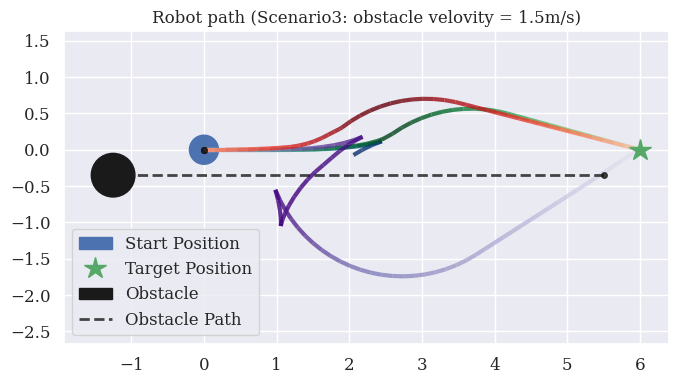

In [25]:
# 绘图
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyArrowPatch


import sys
sys.path.append('/home/pj/jane_ws-github/Demo-Cbf2311/')

import config

font_properties = FontProperties(family='serif', style='normal', weight='normal', size=12)
color_list = ['#3887BE','#219C90','#E9B824','#D83F31']
colors_list = ["Blues_r", "Greens_r", "Purples_r", "Reds_r"]
controller_list = ["DC", "SCBF", "DCBF", "ACBF"]
plot_size = (7.0,  4.0)

# set scenario
scenario = 3
doc_path = "../results_seaborn/24-01-22/scenario{}/".format(scenario)
label_sign = True
sample_time = 0
outfile_name = "Path_comparisons{}".format(scenario)

# -----------------------------------------------------------------------------------
sns.set_theme()
fig, axs = plt.subplots(figsize=plot_size)
# if label_sign:
# axs.set_xlabel('X(m)', fontproperties=font_properties)
# axs.set_ylabel('Y(m)', fontproperties=font_properties)
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)
axs.set_xlim(-1.0, 7.0)
axs.set_ylim(-2, 1.2)
plt.title("Robot path (Scenario{}: obstacle velovity = {}m/s)".format(scenario, scenario*0.5), fontproperties=font_properties)
plt.tight_layout()
axs.axis('equal')   

final_data = pd.DataFrame
mindix_index = 0
for i in range(len(controller_list)):
    file_name = "Excel-{}.xlsx".format(controller_list[i])
    file_path = doc_path+file_name
    data = pd.read_excel(file_path)

    ro_x = data['robot_x'].to_numpy()
    ro_y = data['robot_y'].to_numpy()
    ro_dis = data['distance'].to_numpy()
    if scenario == 3 and i == 0:
        print('------------------------------')
        ro_x = ro_x[:21]
        ro_y = ro_y[:21]
        ro_dis = ro_dis[:21]
    points = np.array([ro_x, ro_y]).T.reshape(-1,1,2) 
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(ro_dis.min(),ro_dis.max()+1)
    final_data = data
    mindix_index = np.argmin(ro_dis)

    lc = LineCollection(segments, cmap = colors_list[i], norm=norm, linewidth = 3, alpha=0.8)
    lc.set_array(ro_dis)
    line = axs.add_collection(lc)

    end_pos = (ro_x[sample_time], ro_y[sample_time])
    axs.plot(end_pos[0], end_pos[1], 'k.', markersize=8, alpha=0.9) 

# Plot initial position 
axs.add_patch(plt.Circle(config.x0[:2], config.r, color='b', alpha = 1, label="Start Position"))

# Plot goal
axs.plot(config.goal[0], config.goal[1], 'g*', markersize=16, label="Target Position")   

# Plot moving obstacle trajectory
if config.moving_obstacles_on is True:
    start_pos = (final_data['obs_x0'].to_numpy()[0], 
                 final_data['obs_y0'].to_numpy()[0])
    end_pos = (final_data['obs_x0'].to_numpy()[-1], 
               final_data['obs_y0'].to_numpy()[-1])

    # plot obstacle position
    cir0 = plt.Circle(end_pos, config.moving_obs[0][4], color='k', alpha=1, label = "Obstacle")
    axs.add_patch(cir0)

    # plot obstacle path
    axs.plot(final_data['obs_x0'].to_numpy(),final_data['obs_y0'].to_numpy(), 'k--', alpha=0.8,
              linewidth=2, label="Obstacle Path")

    

    # when distance is minest, the obstacle's position with MPC-ACBF
    end_pos = (final_data['obs_x0'].to_numpy()[sample_time], 
                final_data['obs_y0'].to_numpy()[sample_time])
    axs.plot(end_pos[0], end_pos[1], 'k.', markersize=8, alpha=0.8) # label="Sim_time={:.1f}s".format(sample_time*0.1)  

    # when distance is minest, the robot's position with MPC-ACBF
    # end_pos2 = (final_data['robot_x'].to_numpy()[mindix_index], 
    #             final_data['robot_y'].to_numpy()[mindix_index])
    # axs.plot(end_pos2[0], end_pos2[1], 'k.', markersize=10)  

# Only show unique legends
if label_sign:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower left", prop=font_properties)
# plt.savefig(doc_path+outfile_name+'.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 绘制scenario3的各种方法的distance的图像
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyArrowPatch


import sys
sys.path.append('/home/pj/jane_ws-github/Demo-Cbf2311/')

import config

font_properties = FontProperties(family='serif', style='normal', weight='normal', size=12)
color_list = ['#3559E0','#22A699','#E9B824','#D83F31']
# color_list = ['b','g','pink','r']
controller_list = ["DC", "SCBF", "DCBF", "ACBF"]
marker_list = [".", "x", "*", "d"]
plot_size = (7.0,  4.0)

# set scenario
scenario = 2
doc_path = "../results_seaborn/24-01-22/scenario{}/".format(scenario)
label_sign = True
outfile_name = "Distance_comparisons{}".format(scenario)

# ---------------------------------------------------------------------------------------------------------------------
sns.set_theme()
fig, axs = plt.subplots(figsize=plot_size)
# if label_sign:
# axs.set_xlabel('Time(s)', fontproperties=font_properties)
# axs.set_ylabel('Distance(m)', fontproperties=font_properties)
plt.xticks(fontproperties=font_properties)
plt.yticks(fontproperties=font_properties)
axs.set_xlim(1.0, 3.5)
axs.set_ylim(-0.1, 2.5)
plt.title("Distance between robot and obstacle(Scenario{})".format(scenario), fontproperties=font_properties)
plt.tight_layout()
# axs.axis('equal')  

for i in range(len(controller_list)):
    file_name = "Excel-{}.xlsx".format(controller_list[i])
    file_path = doc_path+file_name
    data = pd.read_excel(file_path)

    sim_time = data['Time'].to_numpy()
    ro_dis = data['distance'].to_numpy()

    plt.plot(sim_time, ro_dis, color=color_list[i], label="MPC-"+controller_list[i], linewidth=2.5, marker=marker_list[i], alpha=0.9)

# 在y=0.2处添加虚线
plt.axhline(y=0.2, color='k', linestyle='--', label='Distance=0.2m', linewidth=2.0)

# Only show unique legends
if label_sign:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop=font_properties, fontsize=8)

plt.savefig(doc_path+outfile_name+'.png', dpi=300, bbox_inches='tight')
plt.show()


In [26]:
# 数据处理-得出需要绘制Table的数据
import numpy as np
import pandas as pd

import sys
sys.path.append('/home/pj/jane_ws-github/Demo-Cbf2311/')

import config

controller_list = ["DC", "SCBF", "DCBF", "ACBF"]

# set scenario
scenario = 1
# doc_path = "../results_seaborn/scenario{}/".format(scenario)
label_sign = False

# 需要对比的指标：最短距离（轨迹状态），速度变化量，通行时间，碰撞时间
dp = {}
dist_min = []
lspeed_var = []
aspeed_var = []
time_tra = []
time_col = []
scenario_n = []
controller_n = []
for j in range(3):
    scenario = j+1
    doc_path = "../results_seaborn/24-01-22/scenario{}/".format(scenario)    
    for i in range(len(controller_list)):
        file_name = "Excel-{}.xlsx".format(controller_list[i])
        file_path = doc_path+file_name
        data = pd.read_excel(file_path)
        length = len(data['Time'])
        # print(data.keys())

        scenario_n.append(scenario)
        controller_n.append(controller_list[i])

        # 计算scenario下使用controller的最短距离
        ro_dis = data['distance'].to_numpy()
        dist_min.append(ro_dis.min())
        # 计算碰撞时间
        index_ls = np.where(ro_dis<0)[0]
        if len(index_ls)>0:
            index = index_ls[0]
        else:
            index = 0
        time_col.append(index*0.1)        

        # 计算通行时间
        ro_x = data['robot_x'].to_numpy()
        ro_y = data['robot_y'].to_numpy()
        robot_theta = data['robot_theta'].to_numpy()
        ro_pos = np.column_stack((ro_x, ro_y, robot_theta))
        goal = np.array(config.goal)
        distance = np.linalg.norm(ro_pos-goal, axis=1)
        index_ls = np.where(distance<5e-2)[0]
        if len(index_ls)>0:
            index = index_ls[0]
        else:
            index = length-1
        time_tra.append(index*0.1)

        # 计算速度变化量-标准差
        ro_lspeed = data['robot_v'].to_numpy()
        std_deviation = np.std(ro_lspeed)
        lspeed_var.append(std_deviation)
        ro_aspeed = data['robot_w'].to_numpy()
        std_deviation = np.std(ro_aspeed)
        aspeed_var.append(std_deviation)

dp['scenario_n'] = scenario_n
dp['controller_n'] = controller_n
dp['dist_min'] = dist_min
dp['time_col'] = time_col
dp['time_tra'] = time_tra
dp['lspeed_var'] = lspeed_var
dp['aspeed_var'] = aspeed_var

outdata = pd.DataFrame(dp)

outfile_name = "../results_seaborn/24-01-22/table_data.xlsx"
outdata.to_excel(outfile_name, index=False, float_format="%.3f")
print(outdata) 


    scenario_n controller_n  dist_min  time_col  time_tra  lspeed_var  \
0            1           DC  0.149053       0.0       5.2    0.738008   
1            1         SCBF  0.214353       0.0       5.1    0.736572   
2            1         DCBF  0.296628       0.0       5.2    0.733346   
3            1         ACBF  0.276488       0.0       5.0    0.735186   
4            2           DC  0.078508       0.0       7.9    1.281384   
5            2         SCBF  0.123788       0.0       5.2    0.738577   
6            2         DCBF  0.261961       0.0       5.6    0.733263   
7            2         ACBF  0.320715       0.0       5.0    0.724096   
8            3           DC -0.187919       2.1       7.9    1.296240   
9            3         SCBF  0.072684       0.0       5.1    0.739333   
10           3         DCBF  0.200854       0.0       7.9    1.222327   
11           3         ACBF  0.446233       0.0       5.3    0.711463   

    aspeed_var  
0     0.350644  
1     0.352020  